In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC


#Getting the data
train_data_path=(r"C:\Users\PLAVAK\Desktop\EI_Analytics\Train.xlsx")
test_data_path=(r"C:\Users\PLAVAK\Desktop\EI_Analytics\Test.xlsx")
train_data=pd.read_excel(train_data_path)
test_data=pd.read_excel(test_data_path)
train_data.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [2]:
#As we have obtained the data,let's get more insights of it by performing some basic EDA
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
Loanapp_ID        614 non-null object
Sex               601 non-null object
Marital_Status    611 non-null object
first_name        614 non-null object
last_name         614 non-null object
email             614 non-null object
address           614 non-null object
Dependents        599 non-null object
Qual_var          614 non-null object
SE                582 non-null object
App_Income_1      614 non-null float64
App_Income_2      614 non-null float64
CPL_Amount        612 non-null float64
CPL_Term          600 non-null float64
Credit_His        564 non-null float64
Prop_Area         614 non-null object
INT_ID            614 non-null int64
Prev_ID           614 non-null object
AGT_ID            614 non-null object
CPL_Status        614 non-null object
dtypes: float64(5), int64(1), object(14)
memory usage: 96.1+ KB


In [3]:
#We can see there are 614 examples
#Number of features = 20(incl the target variable 'CPL_Status')
train_data.describe()

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID
count,614.000000,614.000000,612.000000,600.00000,564.000000,6.140000e+02
mean,6484.151140,1945.494958,175.805882,342.00000,0.842199,5.055666e+09
std,7330.850008,3511.498043,102.606123,65.12041,0.364878,2.890445e+09
min,180.000000,0.000000,10.800000,12.00000,0.000000,1.788664e+07
25%,3453.000000,0.000000,120.000000,360.00000,1.000000,2.561243e+09
50%,4575.000000,1426.200000,153.600000,360.00000,1.000000,5.244783e+09
75%,6954.000000,2756.700000,200.700000,360.00000,1.000000,7.495052e+09
max,97200.000000,50000.400000,840.000000,480.00000,1.000000,9.989158e+09


In [4]:
#Missing values info
missing = train_data.isnull().sum().sort_values(ascending=False)
missing_percent = train_data.isnull().sum()/train_data.isnull().count()*100
sorted_missing_percent = (round(missing_percent, 2)).sort_values(ascending=False)
missing_data = pd.concat([missing,sorted_missing_percent],axis=1,keys=['Total Missing', '%Missing'])
missing_data.head(20)

,Total Missing,%Missing
Credit_His,50,8.14
SE,32,5.21
Dependents,15,2.44
CPL_Term,14,2.28
Sex,13,2.12
Marital_Status,3,0.49
CPL_Amount,2,0.33
first_name,0,0.00
last_name,0,0.00
email,0,0.00


In [5]:
#We see that 7 features have missing values
#As for any missing feature, there isn't a significant percentage(max is 8.14% for Credit History), it's not wise to drop any 'consider worth' column
#Everything except 'first_name','last_name','email','address','AGT_ID','INT_ID','Prev_ID','Loanapp_ID'
#makes sense to contribute to 'CPL_Status'

#converting target variable to numeric form
cpl_status = {"N": 0, "Y": 1}
train_data['CPL_Status'] = train_data['CPL_Status'].map(cpl_status)
train_data['CPL_Status'] = train_data['CPL_Status'].astype(int)


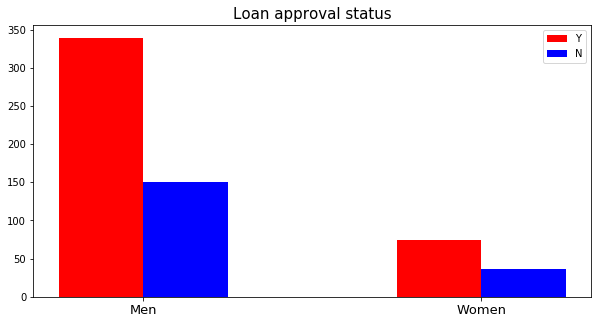

In [6]:
gender=[]
cpl=[]
for i in range(len(train_data)):
    if train_data.Sex[i]=="M" or train_data.Sex[i]=="F":
        gender.append(train_data.Sex[i])
        cpl.append(train_data.CPL_Status[i])
df=pd.DataFrame({"Sex":gender,"CPL_Status":cpl})
male_approve=0
male_disapprove=0
female_approve=0
female_disapprove=0

for i in range(len(df)):
    if df.Sex[i]=="M" and df.CPL_Status[i]==1:
        male_approve+=1
    if df.Sex[i]=="M" and df.CPL_Status[i]==0:
        male_disapprove+=1
    if df.Sex[i]=="F" and df.CPL_Status[i]==1:
        female_approve+=1
    if df.Sex[i]=="F" and df.CPL_Status[i]==0:
        female_disapprove+=1
data = [[male_approve,female_approve],
  [male_disapprove,female_disapprove]]
plt.figure(figsize=(10,5))
X = np.arange(2)
plt.bar(X+0.0,data[0], color = 'red', width = 0.25)
plt.bar(X+0.25,data[1], color = 'blue', width = 0.25)
plt.xticks([0.125,1.125],['Men','Women'],fontsize=13)
plt.legend('YN')
plt.title('Loan approval status',fontsize=15)
plt.show()

#we see that number of women applicants present is significantly less compared to men
#Also, approx. one-third of applications for CPL seem to be rejected(roughly from the figure)

Text(0, 0.5, 'CPL Status')

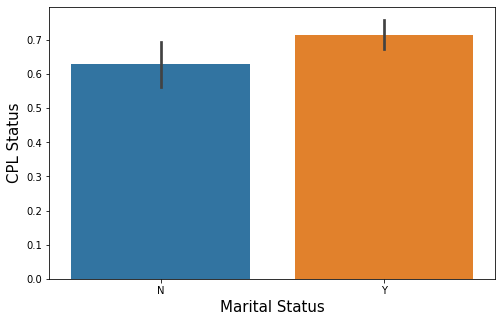

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(x='Marital_Status', y='CPL_Status', data=train_data)
plt.xlabel('Marital Status',fontsize=15)
plt.ylabel('CPL Status',fontsize=15)

#We see that persons who are married tend to have a slightly higher chances of getting loan approved

In [8]:
train_data.Dependents.unique()

array([0, 1, 2, '3+', nan], dtype=object)

C:\Users\PLAVAK\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 6.79999999999999, 'Number of Dependents')

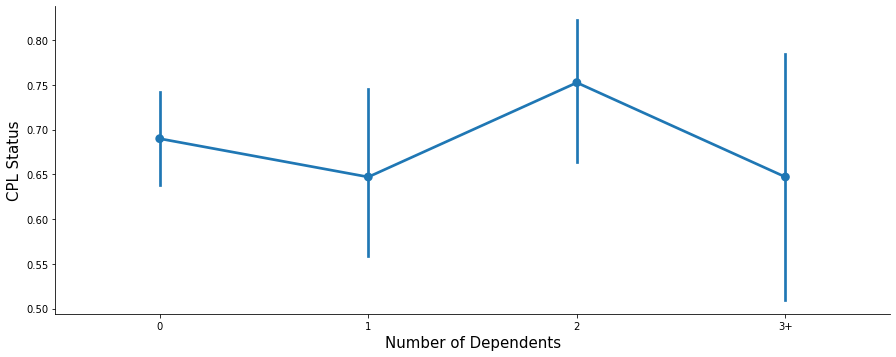

In [9]:
axes = sns.factorplot('Dependents','CPL_Status',data=train_data, aspect = 2.5, )
plt.ylabel('CPL Status',fontsize=15)
plt.xlabel('Number of Dependents',fontsize=15)

#We infer that persons with number of dependents = 2 tend to have a higher chance of loan approval. 
#Other dependents cases have a fair enough chance as well

In [10]:
train_data.Qual_var.unique()

array(['Grad', 'Non Grad'], dtype=object)

Text(0, 0.5, 'CPL Status')

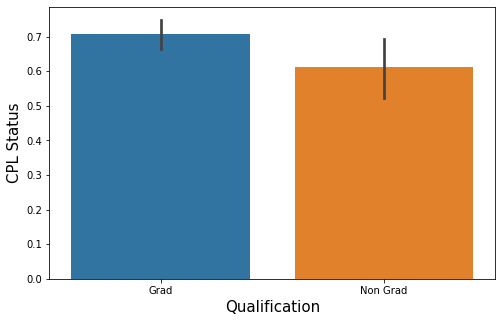

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='Qual_var',y='CPL_Status',data=train_data)
plt.xlabel('Qualification',fontsize=15)
plt.ylabel('CPL Status',fontsize=15)

#We see that graduates have a slightly more chance of getting their loan approved that their non-graduate counterparts

Text(0, 0.5, 'CPL Status')

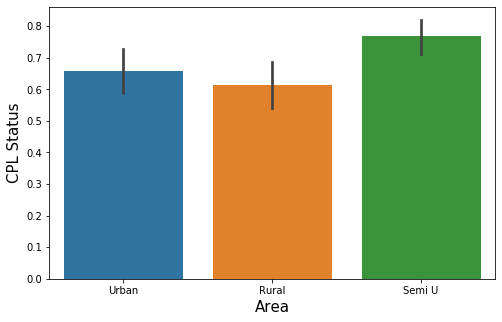

In [12]:
plt.figure(figsize=(8,5))
sns.barplot(x='Prop_Area',y='CPL_Status',data=train_data)
plt.xlabel('Area',fontsize=15)
plt.ylabel('CPL Status',fontsize=15)

#We see that people living in semi urban regions have a higher tendency to get loan approved

In [13]:
train_data['SE'].value_counts()

N    500
Y     82
Name: SE, dtype: int64

Text(0, 0.5, 'CPL Status')

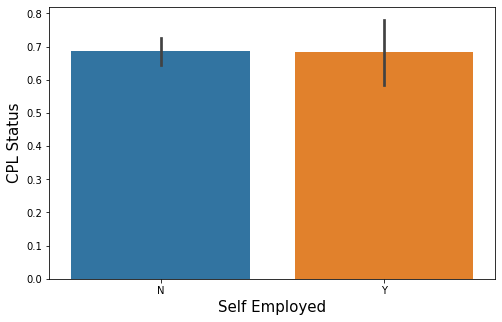

In [14]:
plt.figure(figsize=(8,5))
sns.barplot(x='SE',y='CPL_Status',data=train_data)
plt.xlabel('Self Employed',fontsize=15)
plt.ylabel('CPL Status',fontsize=15)

#Chances of getting a loan in case of Self-Employed status seems unbiased

In [15]:
train_data['Credit_His'].value_counts()

1.0    475
0.0     89
Name: Credit_His, dtype: int64

Text(0, 0.5, 'CPL Status')

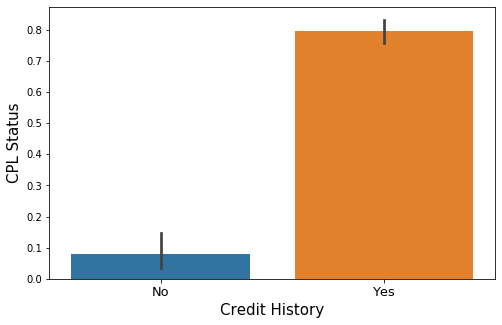

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(x='Credit_His',y='CPL_Status',data=train_data)
plt.xlabel('Credit History',fontsize=15)
plt.xticks([0,1],['No','Yes'],fontsize=13)
plt.ylabel('CPL Status',fontsize=15)

#We can see that a person with no credit history stands with a little chance of loan approval
#Persons with credit history have a high probability of getting loan approval

In [17]:
#We add a new column 'Loan_by_income' which is the person's loan amount divided by his/her income

datasets = [train_data, test_data]
for data in datasets:
    data['Loan_by_income'] = data['CPL_Amount']/data['App_Income_1']
    data['Loan_by_income'] = data['Loan_by_income'].astype(float)
    data['Loan_by_income'] = round(data['Loan_by_income'],2)
    

In [18]:
train_data.describe()
#We see that the maximum value of 'Loan_by_income' is 1.13 and minimum is 0.

,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,INT_ID,CPL_Status,Loan_by_income
count,614.000000,614.000000,612.000000,600.00000,564.000000,6.140000e+02,614.000000,612.000000
mean,6484.151140,1945.494958,175.805882,342.00000,0.842199,5.055666e+09,0.687296,0.043758
std,7330.850008,3511.498043,102.606123,65.12041,0.364878,2.890445e+09,0.463973,0.068371
min,180.000000,0.000000,10.800000,12.00000,0.000000,1.788664e+07,0.000000,0.000000
25%,3453.000000,0.000000,120.000000,360.00000,1.000000,2.561243e+09,0.000000,0.020000
50%,4575.000000,1426.200000,153.600000,360.00000,1.000000,5.244783e+09,1.000000,0.030000
75%,6954.000000,2756.700000,200.700000,360.00000,1.000000,7.495052e+09,1.000000,0.050000
max,97200.000000,50000.400000,840.000000,480.00000,1.000000,9.989158e+09,1.000000,1.130000


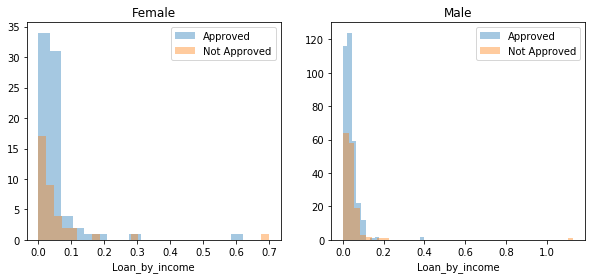

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='F']
men = train_data[train_data['Sex']=='M']
ax = sns.distplot(women[women['CPL_Status']==1].Loan_by_income.dropna(),bins=18,label = 'Approved', ax = axes[0], kde =False)
ax = sns.distplot(women[women['CPL_Status']==0].Loan_by_income.dropna(),bins=30,label = 'Not Approved', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['CPL_Status']==1].Loan_by_income.dropna(),bins=18,label = 'Approved', ax = axes[1], kde = False)
ax = sns.distplot(men[men['CPL_Status']==0].Loan_by_income.dropna(),bins=40,label = 'Not Approved', ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


#We infer that most of the data for 'Loan_by_income' lie within 0.2. 
#For males and females both, 'Loan_by_income' with value less than 0.1 tends to have a higher chance of loan approval

In [20]:
train_data['CPL_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: CPL_Term, dtype: int64

Text(0, 0.5, 'CPL Status')

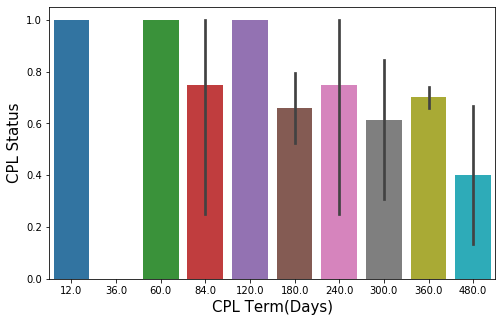

In [21]:
plt.figure(figsize=(8,5))
sns.barplot(x='CPL_Term',y='CPL_Status',data=train_data)
plt.xlabel('CPL Term(Days)',fontsize=15)
plt.ylabel('CPL Status',fontsize=15)

In [22]:
train_data_2=train_data.copy()
datasets=[train_data_2]
for data in datasets:
    data.loc[data['App_Income_2']>0,'Income_2'] = 1
    data.loc[data['App_Income_2']==0,'Income_2'] = 0
    data['Income_2']=data['Income_2'].astype(int)

Text(0.5, 1.0, 'Income 2 and CPL Status')

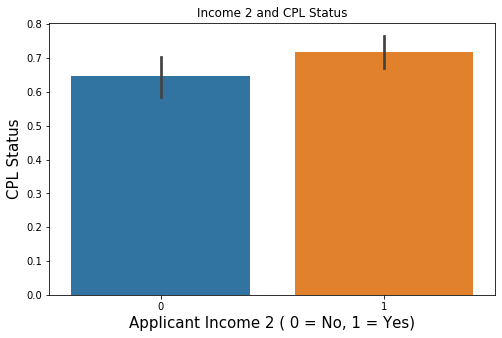

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(x='Income_2',y='CPL_Status',data=train_data_2)
plt.xlabel('Applicant Income 2 ( 0 = No, 1 = Yes)',fontsize=15)
plt.ylabel('CPL Status',fontsize=15)
plt.title("Income 2 and CPL Status")


#We see that applicants having another person's income taken into consideration has a higher chance of getting loan approval

In [24]:
#Now we need to deal with missing values

#Summary of missing values:
#Credit_His = 50
#SE = 32
#Dependents = 15
#CPL_Term = 14
#Sex = 13
#Marital_Status = 3
#CPL_Amount = 2

In [25]:
#We observed that there are 512 entries for 'CPL_Term' with value 360
#So we can fill the missing 14 values with the mode,i.e 360
mode=360
datasets=[train_data,test_data]
for data in datasets:
    data['CPL_Term'] = data['CPL_Term'].fillna(mode)

In [26]:
#For the two missing values of 'CPL_Amount' we can use the mean value to fill them

mean_val = round(train_data.CPL_Amount.mean(),1)
for data in datasets:
    data['CPL_Amount'] = data['CPL_Amount'].fillna(mean_val)
    data['CPL_Amount'] = data['CPL_Amount'].astype(float)

In [27]:
train_data['Marital_Status'].value_counts()

Y    398
N    213
Name: Marital_Status, dtype: int64

In [28]:
#We also fill the missing values for 'Marital_Status' with the mode,i.e Y
mode="Y"
for data in datasets:
    data['Marital_Status'] = data['Marital_Status'].fillna(mode)
    

In [29]:
names=[]
for i in range(len(train_data)):
    if train_data.Sex[i]!="M" and train_data.Sex[i]!="F":
        names.append(train_data.first_name[i])
names        
        

['Crosby',
 'Heall',
 'Ludovico',
 'Rudie',
 'Conant',
 'Byrom',
 'Sarine',
 'Cyrillus',
 'Vina',
 'Wendell',
 'Robby',
 'Clemmie',
 'Francesca']

In [30]:
#For filling the missing values in 'Sex' column, we can refer
#https://www.gpeters.com/names/baby-names.php?
#which is a website to guess gender by names

#The following results were obtained:
#Crosby,Ludovico,Rudie,Conant,Byrom,Wendell and Robby were classified as male
#Sarine,Vina,Clemmie,Francesca were classified as female
#Heall couldn't be classified(so we assume it as a mode value,i.e male)

gender=['M','M','M','M','M','M','F','M','F','M','M','F','F']
j=0
for i in range(len(train_data)):
    if train_data.Sex[i]!="M" and train_data.Sex[i]!="F":
        train_data.Sex[i]=gender[j]
        j+=1

C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
#Repeating the same process for test data
names=[]
for i in range(len(test_data)):
    if test_data.Sex[i]!="M" and test_data.Sex[i]!="F":
        names.append(test_data.first_name[i])
names        

['Karmen',
 'Kareem',
 'Benjy',
 'Donnell',
 'Melina',
 'Michelina',
 'Kayle',
 'Rani',
 'Montague',
 'Ferris',
 'Berni']

In [32]:
gender=['F','M','F','M','F','F','F','F','M','M','M']
j=0
for i in range(len(test_data)):
    if test_data.Sex[i]!="M" and test_data.Sex[i]!="F":
        test_data.Sex[i]=gender[j]
        j+=1

C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [33]:
train_data['SE'].value_counts()

N    500
Y     82
Name: SE, dtype: int64

In [34]:
#We see that there are 32 missing values in 'SE' column
#Also,500 have value "N" and 82 have value "Y"
#So, 86% of the non-missing values are "N" and rest 14% are "Y"
#What we can do is, generate random numbers b/w 1 to 100 and each time we get more than 86
#we can fill the missing value with "Y" and if less than 86,
#we can fill the missing value with "N",each time we iterate along the missing values.
#(Basically a weighted random)

import random
for i in range(len(train_data)):
    if train_data.SE[i]!="Y" and train_data.SE[i]!="N":
        if random.randint(1,100) > 86:
            train_data.SE[i] = "Y"
        else:
            train_data.SE[i] = "N"

C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [35]:
#Applying same for test data

for i in range(len(test_data)):
    if test_data.SE[i]!="Y" and test_data.SE[i]!="N":
        if random.randint(1,100) > 86:
            test_data.SE[i] = "Y"
        else:
            test_data.SE[i] = "N"

C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
train_data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [37]:
#Again for applying same weighted random theory,
#we obtain
#0:57%
#1:17%
#2:17%
#3+:9%
for i in range(len(train_data)):
    if train_data.Dependents[i] not in [0,1,2,"3+"]:
        x = random.randint(1,100)
        if x>=1 and x<57:
            train_data.Dependents[i] = 0
        if x>=57 and x<74:
            train_data.Dependents[i] = 1
        if x>74 and x<91:
            train_data.Dependents[i] = 2
        if x>=91 and x<100:
            train_data.Dependents[i] = "3+"    
for i in range(len(test_data)):
    if test_data.Dependents[i] not in [0,1,2,"3+"]:
        x = random.randint(1,100)
        if x>=1 and x<57:
            test_data.Dependents[i] = 0
        if x>=57 and x<74:
            test_data.Dependents[i] = 1
        if x>74 and x<91:
            test_data.Dependents[i] = 2
        if x>=91 and x<100:
            test_data.Dependents[i] = "3+"             

C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\PLAVAK\Anaconda

In [38]:
train_data['Credit_His'].value_counts()

1.0    475
0.0     89
Name: Credit_His, dtype: int64

In [39]:
#Filling values for 'Credit_His' using weighted random
for i in range(len(train_data)):
    if train_data.Credit_His[i] not in [1.0,0.0]:
        if random.randint(1,100) > 84:
            train_data.Credit_His[i] = "Y"
        else:
            train_data.Credit_His[i] = "N"
                        
for i in range(len(test_data)):
    if test_data.Credit_His[i] not in [0.0,1.0]:
        if random.randint(1,100) > 84:
            test_data.Credit_His[i] = "Y"
        else:
            test_data.Credit_His[i] = "N"                

C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\PLAVAK\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\PLAVAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\PLAVAK\Anaconda3\lib\site-

In [40]:
datasets=[train_data,test_data]
for data in datasets:
    data['Loan_by_income'] = data['CPL_Amount']/data['App_Income_1']
    data['Loan_by_income'] = data['Loan_by_income'].astype(float)
    data['Loan_by_income'] = round(data['Loan_by_income'],2)

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
Loanapp_ID        614 non-null object
Sex               614 non-null object
Marital_Status    614 non-null object
first_name        614 non-null object
last_name         614 non-null object
email             614 non-null object
address           614 non-null object
Dependents        614 non-null object
Qual_var          614 non-null object
SE                614 non-null object
App_Income_1      614 non-null float64
App_Income_2      614 non-null float64
CPL_Amount        614 non-null float64
CPL_Term          614 non-null float64
Credit_His        614 non-null object
Prop_Area         614 non-null object
INT_ID            614 non-null int64
Prev_ID           614 non-null object
AGT_ID            614 non-null object
CPL_Status        614 non-null int32
Loan_by_income    614 non-null float64
dtypes: float64(5), int32(1), int64(1), object(14)
memory usage: 98.5+ KB


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 20 columns):
Loanapp_ID        367 non-null object
Sex               367 non-null object
Marital_Status    367 non-null object
first_name        367 non-null object
last_name         367 non-null object
email             367 non-null object
address           367 non-null object
Dependents        367 non-null object
Qual_var          367 non-null object
SE                367 non-null object
App_Income_1      367 non-null float64
App_Income_2      367 non-null float64
CPL_Amount        367 non-null float64
CPL_Term          367 non-null float64
Credit_His        367 non-null object
INT_ID            367 non-null int64
Prev_ID           367 non-null object
AGT_ID            367 non-null object
Prop_Area         367 non-null object
Loan_by_income    367 non-null float64
dtypes: float64(5), int64(1), object(14)
memory usage: 57.5+ KB


In [43]:
#As we can see we have successfully filled all missing values in train and test data
#We can remove columns that we think would'nt contribute to 'CPL_Status' prediction
train_data = train_data.drop(['Loanapp_ID','first_name','last_name','email','address','INT_ID','Prev_ID','AGT_ID'],axis=1)
train_data.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Loan_by_income
0,M,N,0,Grad,N,7018.8,0.0,175.8,360.0,1,Urban,1,0.03
1,M,Y,1,Grad,N,5499.6,1809.6,153.6,360.0,1,Rural,0,0.03
2,M,Y,0,Grad,Y,3600.0,0.0,79.2,360.0,1,Urban,1,0.02
3,M,Y,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1,Urban,1,0.05
4,M,N,0,Grad,N,7200.0,0.0,169.2,360.0,1,Urban,1,0.02


In [44]:
#We need to convert categorical variables into numeric form

genders = {"M": 0, "F": 1}
datasets = [train_data, test_data]
for data in datasets:
    data['Sex'] = data['Sex'].map(genders)

In [45]:
marriage = {"N": 0, "Y": 1}
for data in datasets:
    data['Marital_Status'] = data['Marital_Status'].map(marriage)

In [46]:
depend = {0:0,1:1,2:2,"3+":3}
for data in datasets:
    data['Dependents'] = data['Dependents'].map(depend)
   
    


In [47]:
qual={"Non Grad":0,"Grad":1}
for data in datasets:
    data['Qual_var'] = data['Qual_var'].map(qual)
    

In [48]:
se={"N":0,"Y":1}
for data in datasets:
    data['SE'] = data['SE'].map(se)
    

In [49]:
area={"Urban":0,"Rural":1,"Semi U":2}
for data in datasets:
    data['Prop_Area'] = data['Prop_Area'].map(area)
    

In [50]:
train_data['CPL_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: CPL_Term, dtype: int64

In [51]:
cpl = {360:1,180:2,480:3,300:4,84:5,240:6,120:7,36:8,60:9,12:10,6:11,350:12}
for data in datasets:
    data['CPL_Term'] = data['CPL_Term'].map(cpl)

In [52]:
credit_history={1:1,0:0,"N":0,"Y":1}
for data in datasets:
    data['Credit_His'] = data['Credit_His'].map(credit_history)
    

In [53]:
train_data['Loan_by_income'].value_counts()

0.02    125
0.03    112
0.04     96
0.01     88
0.05     61
0.06     42
0.07     21
0.08     15
0.00     13
0.10     10
0.09      6
0.11      5
0.12      3
0.17      3
0.28      2
0.70      1
0.13      1
0.30      1
0.19      1
0.39      1
0.18      1
0.62      1
0.40      1
0.15      1
1.13      1
0.14      1
0.20      1
Name: Loan_by_income, dtype: int64

In [54]:
for data in datasets:
    data['Loan_by_income'] = data['Loan_by_income'].astype(float)
    data.loc[(data['Loan_by_income'] >=0.00) & (data['Loan_by_income'] <= 0.01), 'Loan_per_income'] = 0
    data.loc[(data['Loan_by_income'] > 0.01) & (data['Loan_by_income'] <= 0.02), 'Loan_per_income'] = 1
    data.loc[(data['Loan_by_income'] > 0.02) & (data['Loan_by_income'] <= 0.03), 'Loan_per_income'] = 2
    data.loc[(data['Loan_by_income'] > 0.03) & (data['Loan_by_income'] <= 0.04), 'Loan_per_income'] = 3
    data.loc[(data['Loan_by_income'] > 0.04) & (data['Loan_by_income'] <= 0.05), 'Loan_per_income'] = 4
    data.loc[(data['Loan_by_income'] > 0.05) & (data['Loan_by_income'] <= 0.06), 'Loan_per_income'] = 5
    data.loc[(data['Loan_by_income'] > 0.06) & (data['Loan_by_income'] <= 0.09), 'Loan_per_income'] = 6
    data.loc[ data['Loan_by_income'] > 0.09, 'Loan_per_income'] = 7
    data['Loan_per_income'] = data['Loan_per_income'].astype(int)

# let's see how it's distributed train_df['Age'].value_counts()

In [55]:
train_data['Loan_per_income'].value_counts()

1    125
2    112
0    101
3     96
4     61
6     42
5     42
7     35
Name: Loan_per_income, dtype: int64

In [56]:
train_data=train_data.drop(['Loan_by_income'],axis=1)

In [57]:
train_data.info()
#We have converted values into numeric form 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Sex                614 non-null int64
Marital_Status     614 non-null int64
Dependents         614 non-null int64
Qual_var           614 non-null int64
SE                 614 non-null int64
App_Income_1       614 non-null float64
App_Income_2       614 non-null float64
CPL_Amount         614 non-null float64
CPL_Term           614 non-null int64
Credit_His         614 non-null int64
Prop_Area          614 non-null int64
CPL_Status         614 non-null int32
Loan_per_income    614 non-null int32
dtypes: float64(3), int32(2), int64(8)
memory usage: 57.7 KB


In [58]:
train_data.describe()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Loan_per_income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.188925,0.653094,0.768730,0.781759,0.143322,6484.151140,1945.494958,175.805863,1.335505,0.783388,1.050489,0.687296,2.586319
std,0.391768,0.476373,1.022711,0.413389,0.350687,7330.850008,3511.498043,102.438603,1.091929,0.412272,0.840875,0.463973,2.052701
min,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,10.800000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,3453.000000,0.000000,120.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,4575.000000,1426.200000,153.600000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,6954.000000,2756.700000,200.100000,1.000000,1.000000,2.000000,1.000000,4.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,97200.000000,50000.400000,840.000000,10.000000,1.000000,2.000000,1.000000,7.000000


In [59]:
train_data.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Loan_per_income
0,0,0,0,1,0,7018.8,0.0,175.8,1,1,0,1,2
1,0,1,1,1,0,5499.6,1809.6,153.6,1,1,1,0,2
2,0,1,0,1,1,3600.0,0.0,79.2,1,1,0,1,1
3,0,1,0,0,0,3099.6,2829.6,144.0,1,1,0,1,4
4,0,0,0,1,0,7200.0,0.0,169.2,1,1,0,1,1


Text(0, 0.5, 'Frequency')

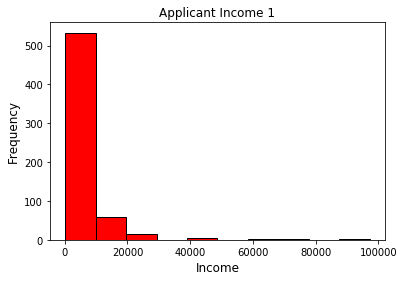

In [60]:
#We need to bin the incomes and CPL amounts

fig, ax = plt.subplots()
train_data['App_Income_1'].hist(color='red', edgecolor='black',  
                          grid=False)
ax.set_title('Applicant Income 1', fontsize=12)
ax.set_xlabel('Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

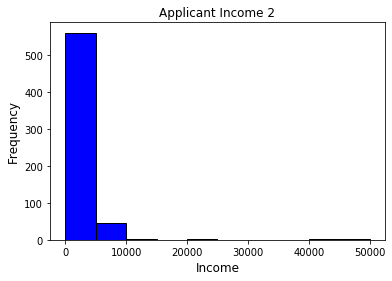

In [61]:
fig, ax = plt.subplots()
train_data['App_Income_2'].hist(color='blue', edgecolor='black',  
                          grid=False)
ax.set_title('Applicant Income 2', fontsize=12)
ax.set_xlabel('Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

Text(0, 0.5, 'Frequency')

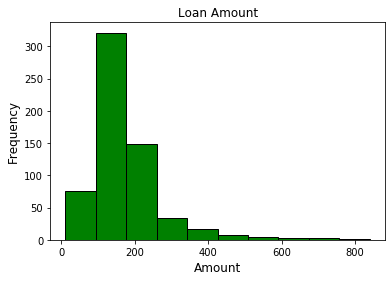

In [62]:
fig, ax = plt.subplots()
train_data['CPL_Amount'].hist(color='green', edgecolor='black',  
                          grid=False)
ax.set_title('Loan Amount', fontsize=12)
ax.set_xlabel('Amount', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [63]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = train_data['App_Income_1'].quantile(quantile_list)
quantiles

0.00      180.0
0.25     3453.0
0.50     4575.0
0.75     6954.0
1.00    97200.0
Name: App_Income_1, dtype: float64

In [64]:
datasets=[train_data,test_data]
for data in datasets:
    data.loc[(data['App_Income_1'] >=0) & (data['App_Income_1'] <= 180), 'Income_1'] = 0
    data.loc[(data['App_Income_1'] > 180) & (data['App_Income_1'] <= 3452.75), 'Income_1'] = 1
    data.loc[(data['App_Income_1'] > 3452.75) & (data['App_Income_1'] <= 4574.50), 'Income_1'] = 2
    data.loc[(data['App_Income_1'] > 4574.50) & (data['App_Income_1'] <= 6954), 'Income_1'] = 3
    data.loc[ data['App_Income_1'] > 6954, 'Income_1'] = 4
    data['Income_1'] = data['Income_1'].astype(int)

In [65]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = train_data['App_Income_2'].quantile(quantile_list)
quantiles

0.00        0.0
0.25        0.0
0.50     1426.2
0.75     2756.7
1.00    50000.4
Name: App_Income_2, dtype: float64

In [66]:
for data in datasets:
    data.loc[data['App_Income_2'] == 0, 'Income_2'] = 0
    data.loc[(data['App_Income_2'] > 0) & (data['App_Income_2'] <= 1426), 'Income_2'] = 1
    data.loc[(data['App_Income_2'] > 1426) & (data['App_Income_2'] <= 2756.25), 'Income_2'] = 2
    data.loc[data['App_Income_2'] > 2756.25, 'Income_2'] = 3
    data['Income_2'] = data['Income_2'].astype(int)

In [67]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = train_data['CPL_Amount'].quantile(quantile_list)
quantiles

0.00     10.8
0.25    120.0
0.50    153.6
0.75    200.1
1.00    840.0
Name: CPL_Amount, dtype: float64

In [68]:
for data in datasets:
    data.loc[(data['CPL_Amount'] >=0) & (data['CPL_Amount'] <= 10.8), 'Loan_Amount'] = 0
    data.loc[(data['CPL_Amount'] > 10.8) & (data['CPL_Amount'] <= 120), 'Loan_Amount'] = 1
    data.loc[(data['CPL_Amount'] > 120) & (data['CPL_Amount'] <= 153.6), 'Loan_Amount'] = 2
    data.loc[(data['CPL_Amount'] > 153.6) & (data['CPL_Amount'] <= 200.1), 'Loan_Amount'] = 3
    data.loc[ data['CPL_Amount'] > 200.1, 'Loan_Amount'] = 4
    data['Loan_Amount'] = data['Loan_Amount'].astype(int)

In [69]:
train_data.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Loan_per_income,Income_1,Income_2,Loan_Amount
0,0,0,0,1,0,7018.8,0.0,175.8,1,1,0,1,2,4,0,3
1,0,1,1,1,0,5499.6,1809.6,153.6,1,1,1,0,2,3,2,2
2,0,1,0,1,1,3600.0,0.0,79.2,1,1,0,1,1,2,0,1
3,0,1,0,0,0,3099.6,2829.6,144.0,1,1,0,1,4,1,3,2
4,0,0,0,1,0,7200.0,0.0,169.2,1,1,0,1,1,4,0,3


In [70]:
#Now we can drop 'App_Income_1','App_Income_2' and 'CPL_Amount' from train data
train_data = train_data.drop(["App_Income_1","App_Income_2","CPL_Amount"],axis=1)
train_data.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Term,Credit_His,Prop_Area,CPL_Status,Loan_per_income,Income_1,Income_2,Loan_Amount
0,0,0,0,1,0,1,1,0,1,2,4,0,3
1,0,1,1,1,0,1,1,1,0,2,3,2,2
2,0,1,0,1,1,1,1,0,1,1,2,0,1
3,0,1,0,0,0,1,1,0,1,4,1,3,2
4,0,0,0,1,0,1,1,0,1,1,4,0,3


In [71]:
test_data=test_data.drop(["first_name","last_name","email","address","INT_ID","Prev_ID","AGT_ID","Loan_by_income","App_Income_1","App_Income_2","CPL_Amount"],axis=1)

In [72]:
Y_train = train_data["CPL_Status"]
X_train = train_data.drop("CPL_Status",axis=1)
X_test  = test_data.drop("Loanapp_ID", axis=1).copy()

In [73]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
log_reg_accuracy = round(log_reg.score(X_train, Y_train) * 100, 2)

C:\Users\PLAVAK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
#Support Vector Classifier
svc = LinearSVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svc_accuracy = round(svc.score(X_train, Y_train) * 100, 2)

C:\Users\PLAVAK\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [75]:
#K-nearest Neighbor
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
knn_accuracy = round(knn.score(X_train, Y_train) * 100, 2)

In [76]:
#Decision Tree
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, Y_train)
Y_pred = d_tree.predict(X_test)
d_tree_accuracy = round(d_tree.score(X_train, Y_train) * 100, 2)

In [77]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_prediction = rf.predict(X_test)
rf_accuracy = round(rf.score(X_train, Y_train) * 100, 2)

In [78]:
#XGB Classifier
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
Y_pred = xgb.predict(X_test)
xgb_accuracy = round(xgb.score(X_train, Y_train) * 100, 2)

In [79]:
models = ['Logistic Regression','SVC','KNN', 'Decision Tree','Random Forest','XGB']
accuracy = [log_reg_accuracy,svc_accuracy,knn_accuracy,d_tree_accuracy,rf_accuracy,xgb_accuracy]
table = pd.DataFrame({'Model':models,'Accuracy':accuracy}).sort_values(by='Accuracy',ascending=False)
table = table.set_index('Accuracy')
table.head(6)

,Model
Accuracy,
99.02,Decision Tree
99.02,Random Forest
98.05,XGB
81.27,KNN
77.69,Logistic Regression
77.69,SVC


In [80]:
#Random Forest and Decision Tree give the highest accuracy
#Let's see the results with K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
random_forest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(random_forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

#This is more realistic.
#The model shows an average accuracy of 72% with standard deviation of 4%

Scores: [0.74603175 0.76190476 0.75409836 0.63934426 0.70491803 0.6557377
 0.73770492 0.73770492 0.73770492 0.72131148]
Mean: 0.7196461098100443
Standard Deviation: 0.03924242009973001


In [81]:
#Let's try to improve the accuracy 
importance = pd.DataFrame({'Feature':X_train.columns,'Importance':np.round(rf.feature_importances_,3)}).sort_values(by='Importance',ascending=False)
importance = importance.set_index('Feature')
importance.head(15)

,Importance
Feature,
Credit_His,0.190
Loan_per_income,0.140
Income_1,0.103
Loan_Amount,0.100
Dependents,0.088
Income_2,0.084
Prop_Area,0.082
CPL_Term,0.064
Sex,0.039


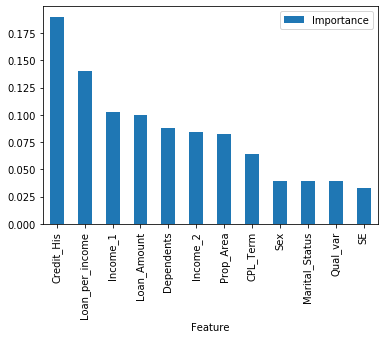

In [82]:
#As we can see Credit_His contributes maximum importance towards predicting CPL_Status
importance.plot.bar()